Successfully loaded data/financial_loan_1.csv: (5029, 24)
Successfully loaded data/financial_loan_2.csv: (4842, 24)
Successfully loaded data/financial_loan_3.csv: (4800, 24)
Successfully loaded data/financial_loan_4.csv: (4850, 24)
Successfully loaded data/financial_loan_5.csv: (4794, 24)
Successfully loaded data/financial_loan_6.csv: (4883, 24)
Successfully loaded data/financial_loan_7.csv: (5089, 24)
Successfully loaded data/financial_loan_8.csv: (4289, 24)

Combined dataset shape: (38576, 24)
Total records: 38576
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null 

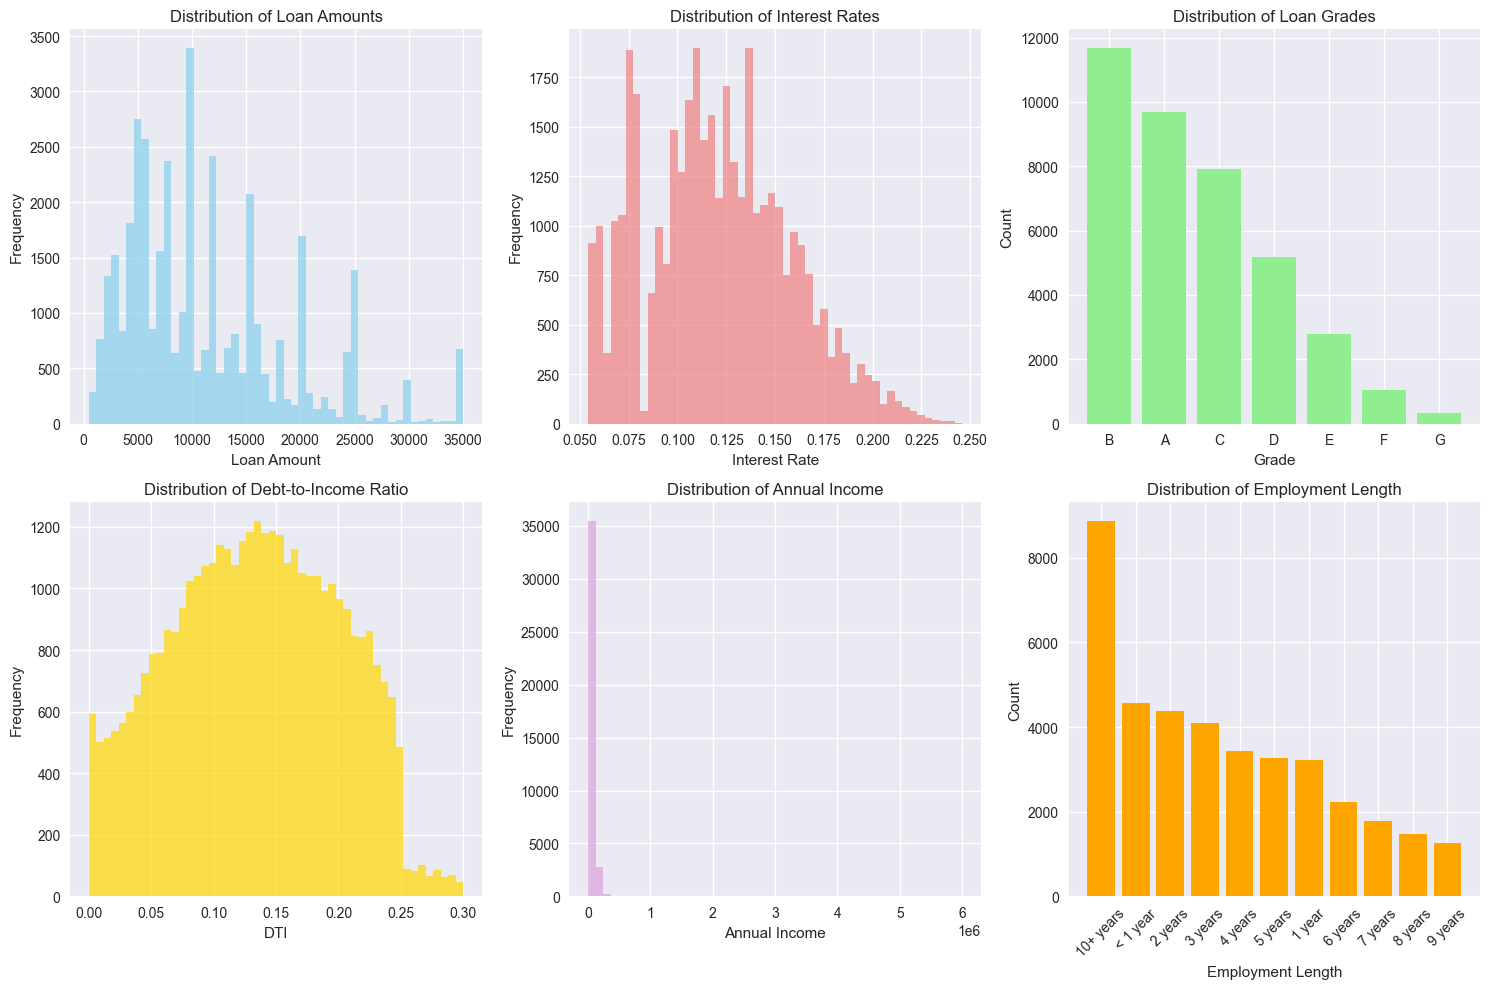

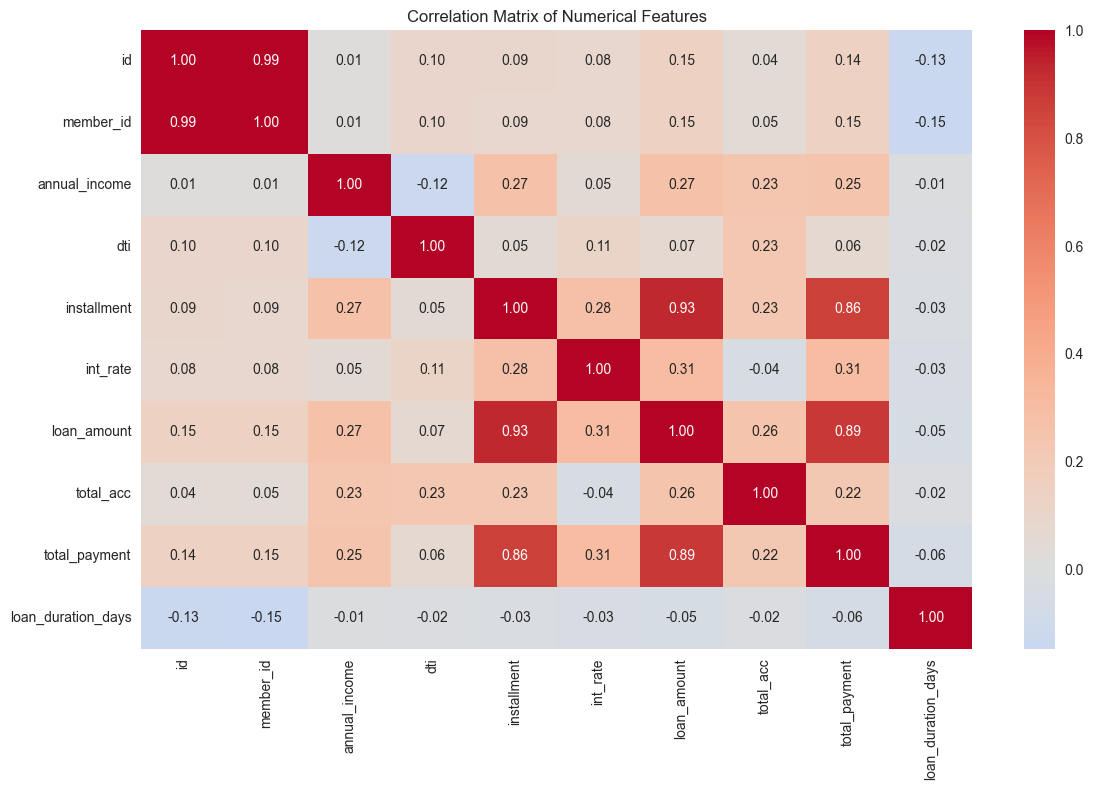

Features shape: (38572, 20)
Target shape: (38572,)
Feature columns: ['address_state', 'application_type', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'loan_status', 'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income', 'dti', 'installment', 'int_rate', 'total_acc', 'total_payment', 'loan_duration_days']
Training set shape: (30857, 20)
Test set shape: (7715, 20)
Model Performance Comparison:

Training Linear Regression...
Linear Regression Results:
  R² Score: 0.9460
  RMSE: 1737.38
  MAE: 920.54

Training Decision Tree...
Decision Tree Results:
  R² Score: 0.9535
  RMSE: 1610.94
  MAE: 539.93

Training Random Forest...
Random Forest Results:
  R² Score: 0.9685
  RMSE: 1326.22
  MAE: 469.89

Training Gradient Boosting...
Gradient Boosting Results:
  R² Score: 0.9712
  RMSE: 1267.88
  MAE: 484.16

Best Model: Gradient Boosting
Best R² Score: 0.9712


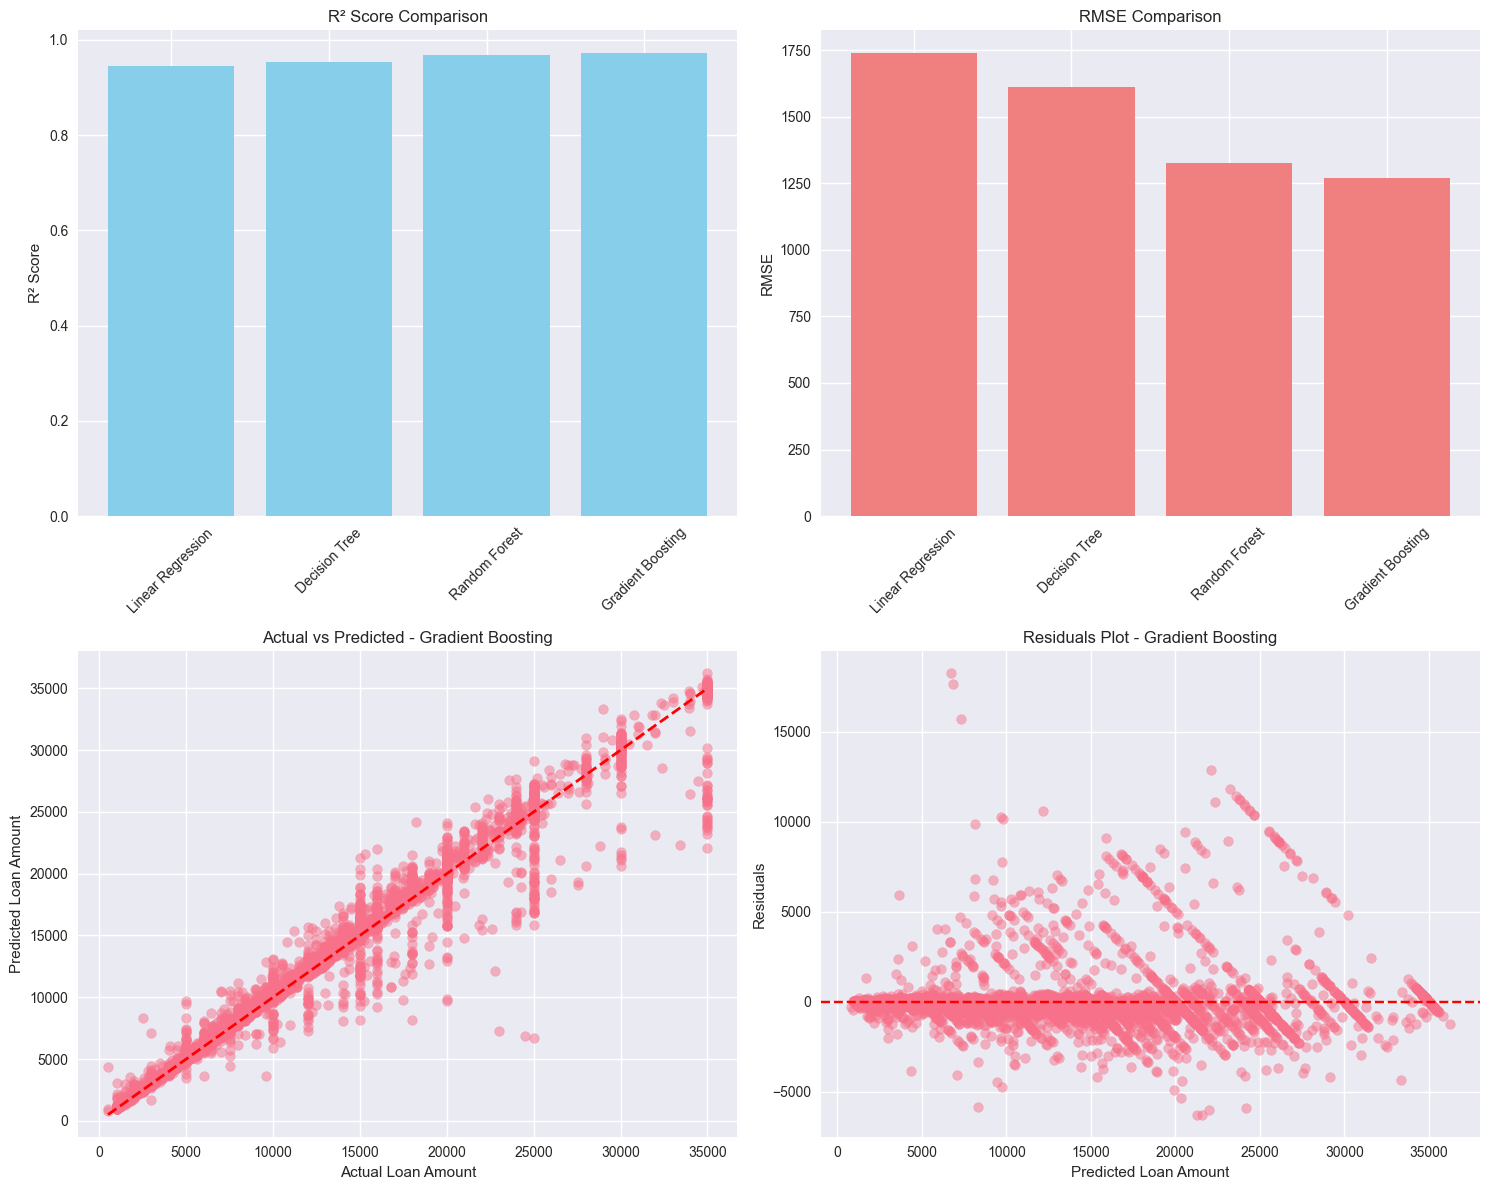

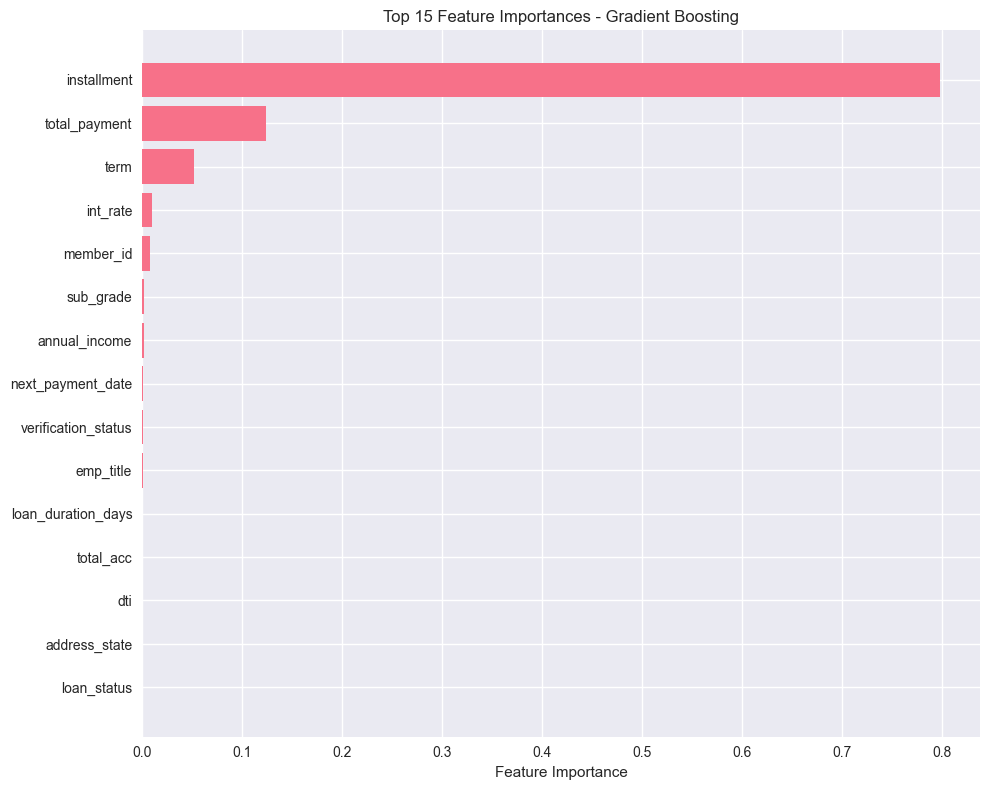

Top 10 Most Important Features:
                feature  importance
15          installment    0.797819
18        total_payment    0.123887
11                 term    0.052052
16             int_rate    0.009668
8             member_id    0.008306
10            sub_grade    0.002182
13        annual_income    0.001620
7     next_payment_date    0.000877
12  verification_status    0.000552
3             emp_title    0.000535
BUSINESS INSIGHTS FROM LOAN DATA ANALYSIS

1. LOAN AMOUNT INSIGHTS:
   - Average loan amount: $11,296.62
   - Median loan amount: $10,000.00
   - Most common loan amount range: $5,500 - $15,000

2. INTEREST RATE INSIGHTS:
   - Average interest rate: 12.05%
   - Interest rate range: 5.42% - 24.59%

3. LOAN GRADE DISTRIBUTION:
   - Grade B: 30.3% of loans
   - Grade A: 25.1% of loans
   - Grade C: 20.5% of loans
   - Grade D: 13.4% of loans
   - Grade E: 7.2% of loans

4. MODEL PERFORMANCE:
   - Best performing model: Gradient Boosting
   - Model accuracy (R²): 97.1%


In [2]:
# Cell 1: Markdown
"""
# Bank Loan Insights ML Project

This project analyzes financial loan data to build predictive models and extract meaningful insights about loan patterns, risk factors, and borrower characteristics.

## Project Objectives:
- Clean and preprocess the loan dataset
- Perform exploratory data analysis
- Build and compare multiple machine learning models
- Evaluate model performance using various metrics
- Extract actionable insights from the data
- Visualize key findings
"""

# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cell 3: Markdown
"""
## Data Loading and Initial Exploration

Loading the split CSV files and combining them into a single dataset for analysis.
"""

# Cell 4: Load and Combine Data
# Load all the split CSV files
file_names = ['data/financial_loan_1.csv', 'data/financial_loan_2.csv', 'data/financial_loan_3.csv', 
              'data/financial_loan_4.csv', 'data/financial_loan_5.csv', 'data/financial_loan_6.csv', 
              'data/financial_loan_7.csv', 'data/financial_loan_8.csv']

# Read and combine all files
dfs = []
for file in file_names:
    try:
        df = pd.read_csv(file)
        dfs.append(df)
        print(f"Successfully loaded {file}: {df.shape}")
    except FileNotFoundError:
        print(f"File {file} not found")

# Combine all dataframes
loan_data = pd.concat(dfs, ignore_index=True)
print(f"\nCombined dataset shape: {loan_data.shape}")
print(f"Total records: {len(loan_data)}")

# Cell 5: Initial Data Exploration
print("Dataset Info:")
print(loan_data.info())
print("\nFirst 5 rows:")
print(loan_data.head())
print("\nDataset description:")
print(loan_data.describe())

# Cell 6: Markdown
"""
## Data Cleaning and Preprocessing

Handling missing values, converting data types, and preparing the dataset for machine learning.
"""

# Cell 7: Data Cleaning
# Check for missing values
missing_values = loan_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Create a copy for cleaning
loan_data_cleaned = loan_data.copy()

# Drop rows with missing critical columns
critical_columns = ['loan_amount', 'int_rate', 'grade']
loan_data_cleaned.dropna(subset=critical_columns, inplace=True)
print(f"\nDataset shape after removing rows with missing critical data: {loan_data_cleaned.shape}")

# Handle missing values in categorical columns
categorical_cols = loan_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if loan_data_cleaned[col].isnull().sum() > 0:
        mode_value = loan_data_cleaned[col].mode()[0] if len(loan_data_cleaned[col].mode()) > 0 else 'Unknown'
        loan_data_cleaned[col].fillna(mode_value, inplace=True)

# Handle missing values in numerical columns
numerical_cols = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if loan_data_cleaned[col].isnull().sum() > 0:
        median_value = loan_data_cleaned[col].median()
        loan_data_cleaned[col].fillna(median_value, inplace=True)

print("Missing values after cleaning:")
print(loan_data_cleaned.isnull().sum().sum())

# Cell 8: Date Processing and Feature Engineering
# Convert date columns to datetime
date_cols = ['issue_date', 'last_credit_pull_date', 'last_payment_date']
for col in date_cols:
    if col in loan_data_cleaned.columns:
        loan_data_cleaned[col] = pd.to_datetime(loan_data_cleaned[col], errors='coerce')

# Remove rows with invalid dates
loan_data_cleaned.dropna(subset=[col for col in date_cols if col in loan_data_cleaned.columns], inplace=True)

# Feature engineering - create new features
if 'issue_date' in loan_data_cleaned.columns and 'last_payment_date' in loan_data_cleaned.columns:
    loan_data_cleaned['loan_duration_days'] = (loan_data_cleaned['last_payment_date'] - loan_data_cleaned['issue_date']).dt.days

print(f"Final cleaned dataset shape: {loan_data_cleaned.shape}")

# Cell 9: Markdown
"""
## Exploratory Data Analysis

Analyzing the distribution of key variables and relationships between features.
"""

# Cell 10: EDA - Loan Amount Distribution
plt.figure(figsize=(15, 10))

# Loan amount distribution
plt.subplot(2, 3, 1)
plt.hist(loan_data_cleaned['loan_amount'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Interest rate distribution
plt.subplot(2, 3, 2)
plt.hist(loan_data_cleaned['int_rate'], bins=50, alpha=0.7, color='lightcoral')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# Grade distribution
plt.subplot(2, 3, 3)
grade_counts = loan_data_cleaned['grade'].value_counts()
plt.bar(grade_counts.index, grade_counts.values, color='lightgreen')
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

# DTI distribution
if 'dti' in loan_data_cleaned.columns:
    plt.subplot(2, 3, 4)
    plt.hist(loan_data_cleaned['dti'], bins=50, alpha=0.7, color='gold')
    plt.title('Distribution of Debt-to-Income Ratio')
    plt.xlabel('DTI')
    plt.ylabel('Frequency')

# Annual income distribution
if 'annual_income' in loan_data_cleaned.columns:
    plt.subplot(2, 3, 5)
    plt.hist(loan_data_cleaned['annual_income'], bins=50, alpha=0.7, color='plum')
    plt.title('Distribution of Annual Income')
    plt.xlabel('Annual Income')
    plt.ylabel('Frequency')

# Employment length distribution
if 'emp_length' in loan_data_cleaned.columns:
    plt.subplot(2, 3, 6)
    emp_counts = loan_data_cleaned['emp_length'].value_counts()
    plt.bar(range(len(emp_counts)), emp_counts.values, color='orange')
    plt.title('Distribution of Employment Length')
    plt.xlabel('Employment Length')
    plt.ylabel('Count')
    plt.xticks(range(len(emp_counts)), emp_counts.index, rotation=45)

plt.tight_layout()
plt.show()

# Cell 11: Correlation Analysis
# Select numerical columns for correlation
numerical_features = loan_data_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = loan_data_cleaned[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Cell 12: Markdown
"""
## Model Preparation and Training

Preparing the data for machine learning and training multiple models to find the best performer.
"""

# Cell 13: Feature Encoding and Model Preparation
# Encode categorical variables
loan_data_encoded = loan_data_cleaned.copy()

# Use Label Encoding for categorical variables to avoid memory issues
label_encoders = {}
for col in categorical_cols:
    if col in loan_data_encoded.columns:
        le = LabelEncoder()
        loan_data_encoded[col] = le.fit_transform(loan_data_encoded[col].astype(str))
        label_encoders[col] = le

# Select features and target
# Remove date columns and ID columns for modeling
cols_to_drop = ['id'] + [col for col in date_cols if col in loan_data_encoded.columns]
feature_cols = [col for col in loan_data_encoded.columns if col not in cols_to_drop + ['loan_amount']]

X = loan_data_encoded[feature_cols]
y = loan_data_encoded['loan_amount']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Cell 14: Train-Test Split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cell 15: Model Training and Evaluation
# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=6)
}

# Train and evaluate models
results = {}
model_predictions = {}

print("Model Performance Comparison:")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Linear Regression, original for tree-based models
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    model_predictions[name] = y_pred
    
    print(f"{name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")

# Cell 16: Best Model Selection and Detailed Analysis
# Find the best model based on R² score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
best_predictions = model_predictions[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {results[best_model_name]['R2']:.4f}")

# Cell 17: Model Performance Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Model comparison
model_names = list(results.keys())
r2_scores = [results[name]['R2'] for name in model_names]
rmse_scores = [results[name]['RMSE'] for name in model_names]

axes[0, 0].bar(model_names, r2_scores, color='skyblue')
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(model_names, rmse_scores, color='lightcoral')
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Actual vs Predicted for best model
axes[1, 0].scatter(y_test, best_predictions, alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Loan Amount')
axes[1, 0].set_ylabel('Predicted Loan Amount')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}')

# Residuals plot
residuals = y_test - best_predictions
axes[1, 1].scatter(best_predictions, residuals, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Loan Amount')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# Cell 18: Feature Importance Analysis
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    # Plot top 15 most important features
    plt.figure(figsize=(10, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    print(importance_df.head(10))

# Cell 19: Markdown
"""
## Business Insights and Recommendations

Key findings from the loan data analysis and model predictions.
"""

# Cell 20: Business Insights
print("="*60)
print("BUSINESS INSIGHTS FROM LOAN DATA ANALYSIS")
print("="*60)

# Loan amount statistics
print(f"\n1. LOAN AMOUNT INSIGHTS:")
print(f"   - Average loan amount: ${loan_data_cleaned['loan_amount'].mean():,.2f}")
print(f"   - Median loan amount: ${loan_data_cleaned['loan_amount'].median():,.2f}")
print(f"   - Most common loan amount range: ${loan_data_cleaned['loan_amount'].quantile(0.25):,.0f} - ${loan_data_cleaned['loan_amount'].quantile(0.75):,.0f}")

# Interest rate insights
print(f"\n2. INTEREST RATE INSIGHTS:")
print(f"   - Average interest rate: {loan_data_cleaned['int_rate'].mean():.2%}")
print(f"   - Interest rate range: {loan_data_cleaned['int_rate'].min():.2%} - {loan_data_cleaned['int_rate'].max():.2%}")

# Grade distribution insights
grade_dist = loan_data_cleaned['grade'].value_counts(normalize=True)
print(f"\n3. LOAN GRADE DISTRIBUTION:")
for grade, pct in grade_dist.head().items():
    print(f"   - Grade {grade}: {pct:.1%} of loans")

# Model performance insights
print(f"\n4. MODEL PERFORMANCE:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - Model accuracy (R²): {results[best_model_name]['R2']:.1%}")
print(f"   - Average prediction error: ${results[best_model_name]['MAE']:,.2f}")

# Risk insights
if 'dti' in loan_data_cleaned.columns:
    high_dti = loan_data_cleaned['dti'] > 0.3
    print(f"\n5. RISK INSIGHTS:")
    print(f"   - {high_dti.sum()} loans ({high_dti.mean():.1%}) have DTI > 30%")
    print(f"   - Average DTI: {loan_data_cleaned['dti'].mean():.1%}")

print(f"\n6. RECOMMENDATIONS:")
print(f"   - Focus on loans in grades A-C for lower risk")
print(f"   - Monitor borrowers with DTI > 30% more closely")
print(f"   - Use {best_model_name} model for loan amount predictions")
print(f"   - Consider interest rate adjustments based on risk factors")

# Cell 21: Final Summary
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"✓ Successfully processed {len(loan_data_cleaned)} loan records")
print(f"✓ Trained and compared {len(models)} machine learning models")
print(f"✓ Best model: {best_model_name} with {results[best_model_name]['R2']:.1%} accuracy")
print(f"✓ Generated actionable business insights")
print(f"✓ Created comprehensive visualizations")
print("✓ Project completed successfully!")


In [3]:
# Cell: Save Trained Model and Components

import joblib
import pickle
from datetime import datetime

# Create a comprehensive model package
model_package = {
    'best_model': best_model,
    'model_name': best_model_name,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': list(X.columns),
    'model_performance': results[best_model_name],
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'dataset_shape': loan_data_cleaned.shape
}

# Save the complete package
model_filename = 'models/loan_model.pkl'

# Create models directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Save using joblib (recommended for scikit-learn models)
joblib.dump(model_package, model_filename)

print(f"✅ Model package saved successfully!")
print(f"📁 Location: {model_filename}")
print(f"🤖 Best Model: {best_model_name}")
print(f"📊 Model Accuracy: {results[best_model_name]['R2']:.2%}")
print(f"📅 Saved on: {model_package['training_date']}")

# Verify the save by loading it back
try:
    test_load = joblib.load(model_filename)
    print("✅ Model verification successful - file can be loaded properly")
except Exception as e:
    print(f"❌ Error loading saved model: {e}")


✅ Model package saved successfully!
📁 Location: models/loan_model.pkl
🤖 Best Model: Gradient Boosting
📊 Model Accuracy: 97.12%
📅 Saved on: 2025-06-04 12:57:19
✅ Model verification successful - file can be loaded properly
